In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G, pi

In [2]:
def distance(lat1, lon1, lat2, lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c
    return distance
#verification dla fonction, ça semble ok! :=)
dis = distance(49.6833, 5.8167, 50.8466, 4.3528)
print(dis)

166.0034194605239


In [3]:
#servira pour la représentation 3D 
def convert(lat, lon):
    lat = math.radians(lat)
    lon = math.radians(lon)
    x = math.cos(lat) * math.cos(lon)
    y = math.cos(lat) * math.sin(lon)
    z = math.sin(lat)
    return x, y, z
#verification dla fonction, ça semble ok! :=)
x, y, z = convert(49.6833, 5.8167)
print(x, y, z)

0.6436807188974397 0.06557225809075846 0.7624797774948225


In [4]:
def convert2(x, y, z):
    lat = math.asin(z)
    lon = math.atan2(y, x)
    return math.degrees(lat), math.degrees(lon)
#verification dla fonction, ça semble ok! :=)
lat, lon = convert2(0.6436807188974397, 0.06557225809075846, 0.7624797774948225)
print(lat, lon)

49.6833 5.8167


In [5]:
def calculate_viewing_angle(lat_sat, lon_sat, alt_sat, lat_point, lon_point):
    R = 6371  # Rayon de la Terre en kilomètres

    x_sat, y_sat, z_sat = convert(lat_sat, lon_sat)
    x_sat *= R + alt_sat
    y_sat *= R + alt_sat
    z_sat *= R + alt_sat

    x_point, y_point, z_point = convert(lat_point, lon_point)
    x_point *= R
    y_point *= R
    z_point *= R

    vector_earth_to_sat = [x_sat, y_sat, z_sat]
    vector_earth_to_point = [x_point, y_point, z_point]

    # Calcul de l'angle en utilisant le produit scalaire
    dot_product = sum(p*q for p, q in zip(vector_earth_to_sat, vector_earth_to_point))
    magnitude_sat = math.sqrt(sum([x**2 for x in vector_earth_to_sat]))
    magnitude_point = math.sqrt(sum([x**2 for x in vector_earth_to_point]))

    angle = math.acos(dot_product / (magnitude_sat * magnitude_point))


    angle_degrees = math.degrees(angle)

    return angle_degrees

def is_point_visible_by_satellite(lat_sat, lon_sat, alt_sat, lat_point, lon_point, max_angle):
    viewing_angle = calculate_viewing_angle(lat_sat, lon_sat, alt_sat, lat_point, lon_point)
    return viewing_angle <= max_angle

In [6]:
max_angle = 75  # Par exemple, cela dépend de la spécification du satellite

# Coordonnées du satellite (latitude, longitude, altitude en kilomètres)
satellite_coords = (0, 0, 500)  # Exemple de coordonnées

# Ensemble de données de test
test_points = [
    (10, 10),   # Point qui devrait être visible
    (80, 80),   # Point probablement hors de vue
    (0, 45),    # Autre point qui pourrait être visible
    (-60, -60)  # Point probablement hors de vue
]

# Tester chaque point
for point in test_points:
    visible = is_point_visible_by_satellite(*satellite_coords, *point, max_angle)
    print(f"Point {point} visible par le satellite : {visible}")

Point (10, 10) visible par le satellite : True
Point (80, 80) visible par le satellite : False
Point (0, 45) visible par le satellite : True
Point (-60, -60) visible par le satellite : False


In [7]:
def gaussienne(thetha, phi, sigma_t, sigma_p):
    return np.exp(-0.5*(((thetha**2)/(sigma_t**2))+((phi**2)/(sigma_p**2))))


j'ai vu qu'Adam taffait déjà dessus en fait donc ok

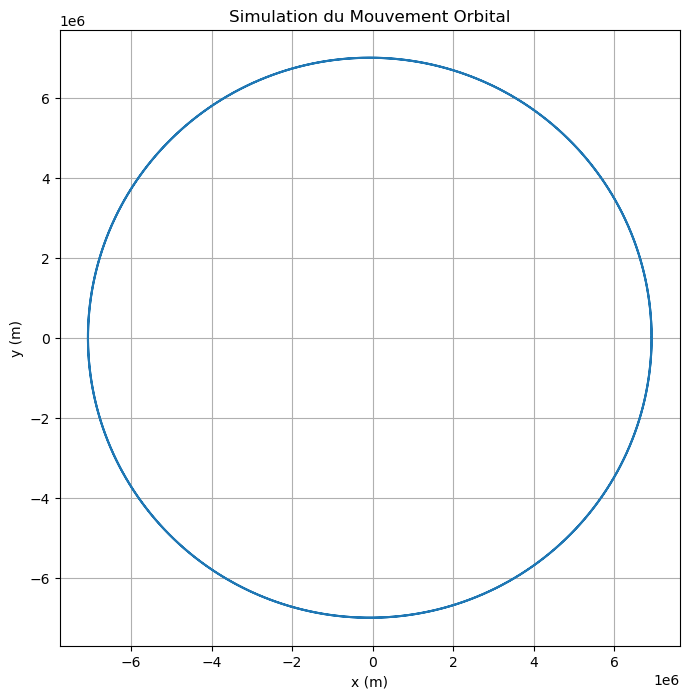

In [8]:
def kepler_orbit(a, e, T, duration, steps):
    # a: demi-grand axe, e: excentricité, T: période orbitale
    # duration: durée totale de la simulation, steps: nombre de points de données 
    n = 2 * pi / T  # Calcul de la vitesse angulaire moyenn
    x_vals, y_vals = [], []

    for t in np.linspace(0, duration, steps):
        M = n * t
        E = M
        for _ in range(10):  
            E = E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))

        theta = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2), np.sqrt(1 - e) * np.cos(E / 2))
        r = a * (1 - e**2) / (1 + e * np.cos(theta))

        x = r * np.cos(theta)
        y = r * np.sin(theta)

        x_vals.append(x)
        y_vals.append(y)

    return x_vals, y_vals

# Paramètres de l'orbite (exemple)
a = 7000e3  # Demi-grand axe (en mètres)
e = 0.01    # Excentricité
T = 6000    # Période orbitale (en secondes)

# Simulation
x_vals, y_vals = kepler_orbit(a, e, T, 2*T, 1000)

# Visualisation
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Simulation du Mouvement Orbital')
plt.grid(True)
plt.show()

Passons à la visualisation 3D de la sphère, j'aimerais pouvoir mettre des points à des coordonnées et qu'on puisse le voir ainsi que des ronds montrant à quel point un satellite couvre le globe

In [9]:
#### JE FAIS SUR sphere.py

sphère générée sur les autres branches

In [10]:
import plotly.graph_objs as go

# Création des coordonnées pour la sphère
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
r = 1  
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Créer la figure avec Plotly
sphere = go.Surface(x=x, y=y, z=z)
fig = go.Figure(data=[sphere])

# Mise à jour de la mise en page pour une meilleure visualisation
fig.update_layout(
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
    )
)

# Affichage de la figure
fig.show()
